<div style="border:solid green 2px; padding: 20px">
<b>Георгий, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

### Инициализация и полезные функции

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Рекомендуется делать краткое вступление в работу и описание того, что планируешь сделать (если план у тебя уже сформирован), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Так работа станет выглядеть презентабельнее.

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind

In [2]:
files = ['calls', 'internet','messages','tariffs','users']
df = { }
df_copy = { }
for file in files:
    df[file] = pd.read_csv('/datasets/' + file + '.csv') 
def save():
    df_copy = df.copy()
def load():
    df = df_copy.copy()

In [3]:
def nullstat(df):
    return df\
    .isna()\
    .sum()\
    .to_frame(name='Nans')\
    .assign(Nans_share = lambda row: row['Nans'] / df.shape[0])\
    .sort_values(by='Nans')\
    .style\
    .bar(color='cyan')

In [4]:
def show_plot(df, xlab=None, ylab=None, name=None, ptype=['hist', 10], range=None, figsize=None):
    kvargs = {
        "title": name,
        "kind": ptype,
        "grid": True
    }
    if not figsize is None:
        kvargs['figsize'] = figsize
    if not range is None:
        kvargs['range'] = range
    if ptype[0] == 'hist':
        kvargs['kind'] = 'hist'
        kvargs['bins'] = ptype[1]
    if ptype[0] == 'line':
        kvargs['kind'] = 'line'
    if ptype[0] == 'box':
        kvargs['kind'] = 'box'
        kvargs['vert'] = ptype[1]
    if ptype[0] == 'scatter':
        kvargs['kind'] = 'scatter'
        kvargs['alpha'] = ptype[1]
        kvargs['x'] = ptype[2]
        kvargs['y'] = ptype[3]
    if ptype[0] == 'pdf':
        mean = round(float(df.mean()),2)
        std = round(float(df.std()),2)
        left = mean - 4 * std
        if left < 0:
            left = 0;
        right = mean + 4 * std
        left3 = round(float(mean - 3 * std),2)
        if left3 < 0:
            left3 = 0
        right3 = round(float((mean + 3 * std)),2)
        x = []
        i = int(left)
        while(i < int(right)):
            x.append(int(i))
            i += 1
        #x = list(range(left,right)) 
        plt.figure(figsize=figsize)
        plt.plot(x, norm.pdf(x,mean,std), linewidth=2)
        plt.title(ptype[1])
        plt.xlabel(xlab + " (std = " + str(std) + ")") 
        plt.ylabel(ylab)
        xcoords = { 
                'mean-3*std': [left3, 'r'],
                'mean': [mean, 'k'],
                'mean+3*std': [right3, 'b']
        }
        for name in xcoords.keys():
            plt.axvline(
                x=xcoords[name][0],\
                label="{} = {}".format(name, xcoords[name][0]),\
                color=xcoords[name][1],\
                linestyle='--')
        plt.legend()
        
        
    if ptype[0] != 'pdf':
        ax = df.plot(**kvargs)
        ax.set_xlabel(xlab)
        ax.set_ylabel(ylab)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересные функции 👍
    
В том числе рекомендую делать описание к собственным функциям, ведь с помощью описания гораздо быстрее понять что же делает сама функция.

</div>

### Первичное изучение и преобразование данных

Пользователи:

In [5]:
df['users'].sample(8)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
381,1381,64,NaN,Москва,Тамара,Серебрякова,2018-01-13,ultra
332,1332,23,NaN,Москва,Джозефина,Тетерина,2018-05-28,smart
14,1014,64,NaN,Чебоксары,Яков,Акинфьев,2018-05-15,smart
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
152,1152,44,NaN,Мурманск,Марина,Щербакова,2018-02-05,ultra
76,1076,40,NaN,Уфа,Фёдор,Шарапов,2018-03-10,smart
112,1112,51,NaN,Ульяновск,Арнольд,Казанцев,2018-09-04,smart
270,1270,18,NaN,Нижневартовск,Мальвина,Вешнякова,2018-07-01,ultra


In [6]:
nullstat(df['users'])

,Nans,Nans_share
user_id,0,0
age,0,0
city,0,0
first_name,0,0
last_name,0,0
reg_date,0,0
tariff,0,0
churn_date,462,0.924


С названиями тарифов все ok? Да:

In [7]:
df['users']['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Большинство людей (92%) продолжали использовать тариф. А что с прекращением по количеству и месяцам? Отказы после августа + значений мало, но с ручным построением распределения мучаться не будем:

In [8]:
df['users']['churn_date'] = \
    df['users']['churn_date'].apply(lambda x: x if pd.isna(x) else pd.to_datetime(x))

In [9]:
df['smart_churn_dates'] = df['users'][['tariff','churn_date']].query('churn_date.notna() & (tariff == "smart")').copy()
df['ultra_churn_dates'] = df['users'][['tariff','churn_date']].query('churn_date.notna() & (tariff == "ultra")').copy()

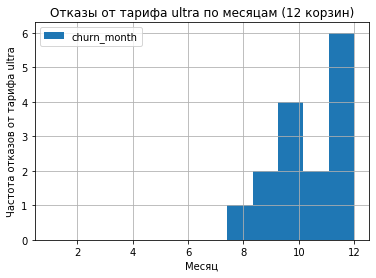

In [10]:
show_plot(\
          df['ultra_churn_dates']\
            .copy()\
            .assign(churn_month = lambda row: row['churn_date'].dt.month)[['churn_month']],\
          xlab='Месяц',
          ylab='Частота отказов от тарифа ultra',
          name='Отказы от тарифа ultra по месяцам (12 корзин)',
          ptype=['hist',12], range=(1,12)) 


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

Причем, от smart отказываются активнее

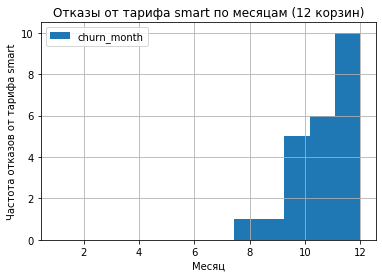

In [11]:
show_plot(\
          df['smart_churn_dates']\
            .copy()\
            .assign(churn_month = lambda row: row['churn_date'].dt.month)[['churn_month']],\
          xlab='Месяц',
          ylab='Частота отказов от тарифа smart',
          name='Отказы от тарифа smart по месяцам (12 корзин)',
          ptype=['hist',12], range=(1,12))

Что в целом с типами данных?

In [12]:
df['users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Поправим даты в reg_date:

In [13]:
df['users']['reg_date'] = df['users']['reg_date'].astype('datetime64')
df['users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Обогатимся периодами и временем использования тарифа днях и посмотрим на них:

In [14]:
def enrich_users_with_usage_data(row):
    if pd.isna(row['churn_date']):
        row['usage_end_date'] = pd.to_datetime('2018-12-31', format='%Y-%m-%d') 
    else:
        row['usage_end_date'] = row['churn_date']
    row['usage_days'] = (row['usage_end_date'] - row['reg_date']).days
    return row

df['users'] = df['users'].apply(enrich_users_with_usage_data, axis=1)

In [15]:
df['usage_days_smart'] = df['users'][['usage_days','tariff']].query('tariff == "smart"')[['usage_days']].copy()
df['usage_days_ultra'] = df['users'][['usage_days','tariff']].query('tariff == "ultra"')[['usage_days']].copy()

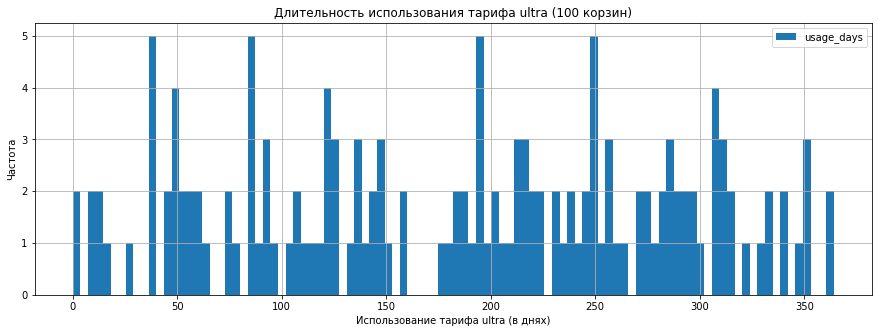

In [16]:
show_plot(\
          df['usage_days_ultra'],\
          xlab='Использование тарифа ultra (в днях)',\
          ylab='Частота',\
          name='Длительность использования тарифа ultra (100 корзин)',
          ptype=['hist',100], figsize=(15,5))


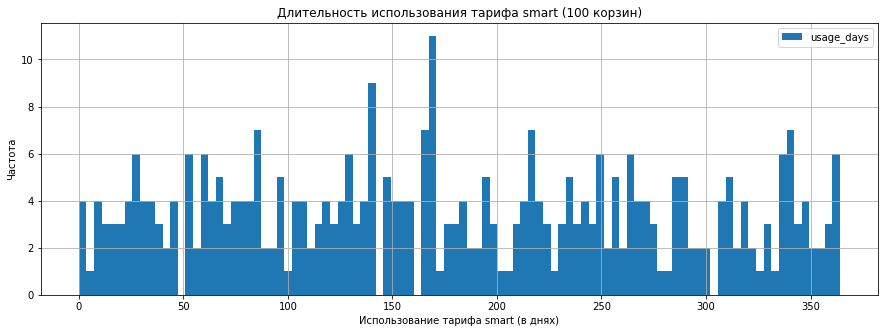

In [17]:
show_plot(\
          df['usage_days_smart'],\
          xlab='Использование тарифа smart (в днях)',\
          ylab='Частота',\
          name='Длительность использования тарифа smart (100 корзин)',
          ptype=['hist',100], figsize=(15,5))

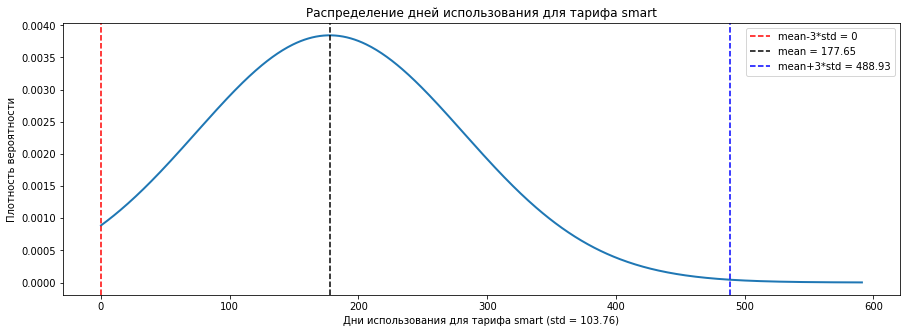

In [18]:
show_plot(df['usage_days_smart'],\
          xlab='Дни использования для тарифа smart',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение дней использования для тарифа smart'], figsize=(15,5))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классный график 👍
    
    
Если вдруг тебе понравилась тема визуализации, рекомендую посмотреть библиотеки `seaborn` и `plotly`.
    
</div>

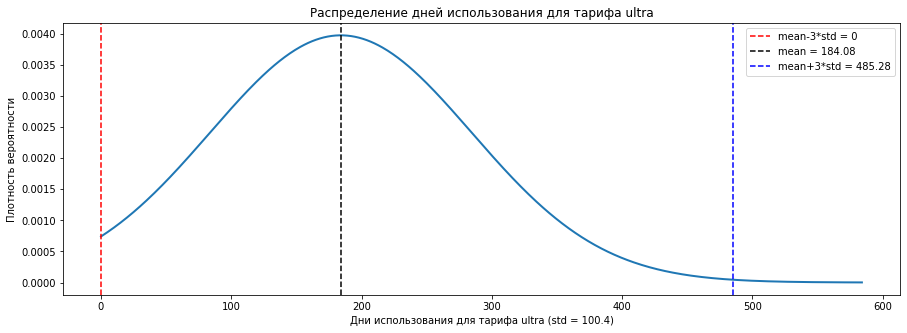

In [19]:
show_plot(df['usage_days_ultra'],\
          xlab='Дни использования для тарифа ultra',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение дней использования для тарифа ultra'], figsize=(15,5))

Где клиенты живут?

In [20]:
df['users']['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Подольск            1
Химки               1
Архангельск         1
Иваново             1
Name: city, Length: 76, dtype: int64

С возрастом все в порядке с точки зрения ограничений? Да:

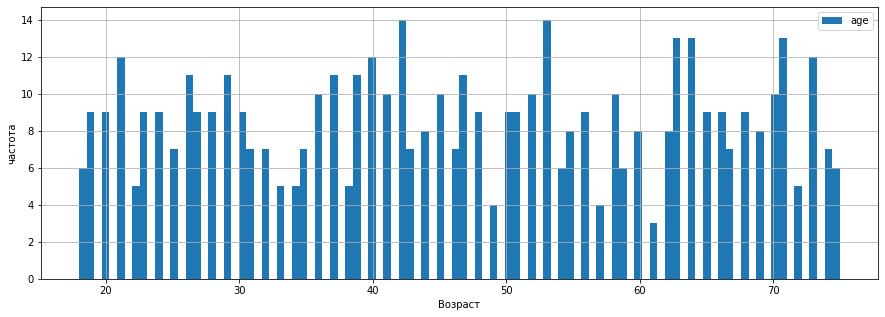

In [21]:
show_plot(df['users'][['age']],xlab='Возраст', ylab='частота',ptype=['hist',100],figsize=(15,5))

Что по звонкам?

In [22]:
nullstat(df['calls'])

,Nans,Nans_share
id,0,0
call_date,0,0
duration,0,0
user_id,0,0


In [23]:
df['calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Поправим даты и id звонков:

In [ ]:
df['calls'] = df['calls'].astype({'call_date': 'datetime64'})
df['calls'] = df['calls'].astype({'id': 'int64'})
df['calls'].info()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

Не звонившие, вероятно, существуют. А вот звонков без людей не бывает. По крайней мере в нашей выборке:

In [25]:
df['calls'].merge(df['users'], on='user_id', how='left').query('user_id.isna()').shape

(0, 13)

Что с длительностью? 

In [26]:
df['calls']['duration'].sample(10)

73712      7.51
179095     7.65
120855    15.08
145650    12.70
135160     0.00
194739    10.36
16355      6.15
87895     10.41
159013    10.56
8480       0.00
Name: duration, dtype: float64

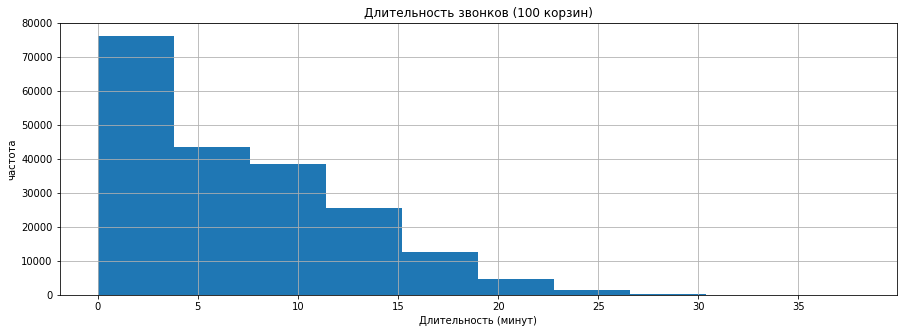

In [27]:
show_plot(df['calls']['duration'],xlab='Длительность (минут)', ylab='частота', name='Длительность звонков (100 корзин)',ptype=['hist',10],figsize=(15,5))

А с нулевой длительностью? Много, почти 20%:

In [28]:
df['calls'][['duration']]\
    .query('duration == 0')\
    .count()\
    .to_frame(name='zeros')\
    .assign(zeros_share = lambda row: row['zeros'] / df['calls'][['duration']].shape[0]) 

,zeros,zeros_share
duration,39613,0.195516


Эти звонки, очевидно, будут тянуть нас "влево" в распределении:

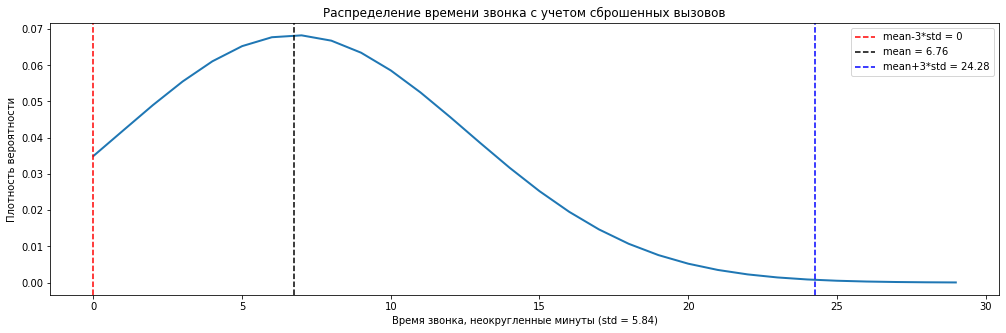

In [29]:
show_plot(df['calls']['duration'],\
          xlab='Время звонка, неокругленные минуты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение времени звонка с учетом сброшенных вызовов'], figsize=(17,5))

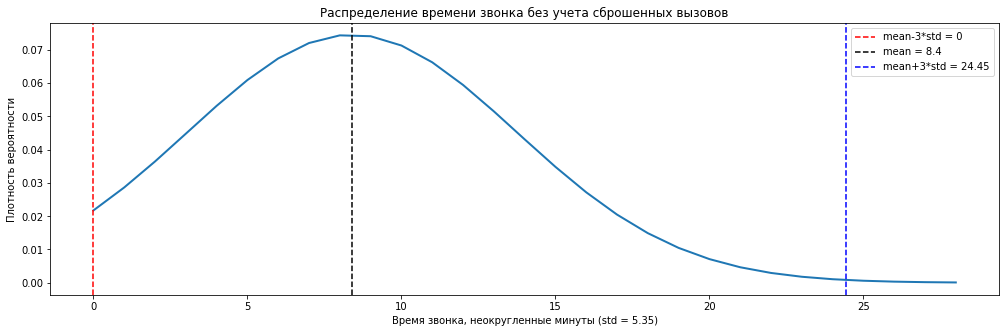

In [30]:
show_plot(df['calls'][['duration']].query('duration > 0'),\
          xlab='Время звонка, неокругленные минуты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение времени звонка без учета сброшенных вызовов'], figsize=(17,5))

Стоит вопрос "какой тариф приносит больше денег". Сброшенные звонки никак не тарифицируются, но картину при исследовании гипотез могут исказить (среднее смещается на почти 2 минуты), поэтому отбросим их без всяких сожалений:

In [31]:
df['calls'] = df['calls'].query('duration > 0')
df['calls'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null int64
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB


И последнее: для корректности расчетов (с учетом тарификационной политики) надо округлить минуты вверх (что, очевидно, сместит нас еще немного вправо):

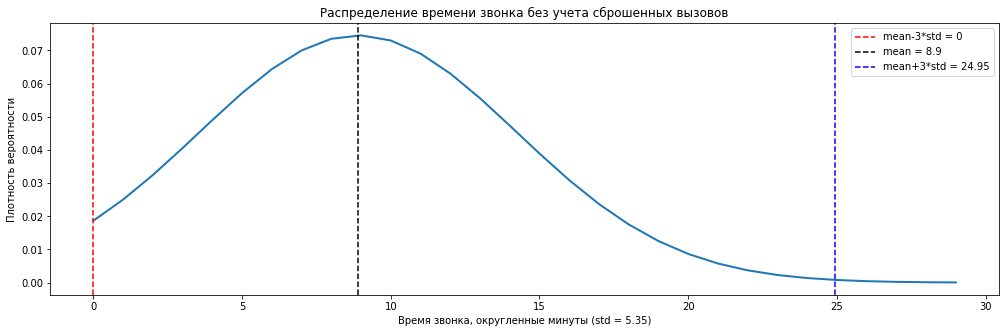

In [32]:
df['calls']['duration'] = df['calls']['duration'].transform(lambda x: int(np.ceil(x)))
df['calls']['duration'] = df['calls']['duration'].astype({'duration': 'int32'})
show_plot(df['calls'][['duration']],\
          xlab='Время звонка, округленные минуты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение времени звонка без учета сброшенных вызовов'], figsize=(17,5))

Посмотрим распределения в разрезе тарифов:

In [33]:
duration2tariff = df['calls'][['user_id','duration']].merge(df['users'][['user_id','tariff']], on='user_id', how='left')
duration2tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 0 to 162993
Data columns (total 3 columns):
user_id     162994 non-null int64
duration    162994 non-null int32
tariff      162994 non-null object
dtypes: int32(1), int64(1), object(1)
memory usage: 4.4+ MB


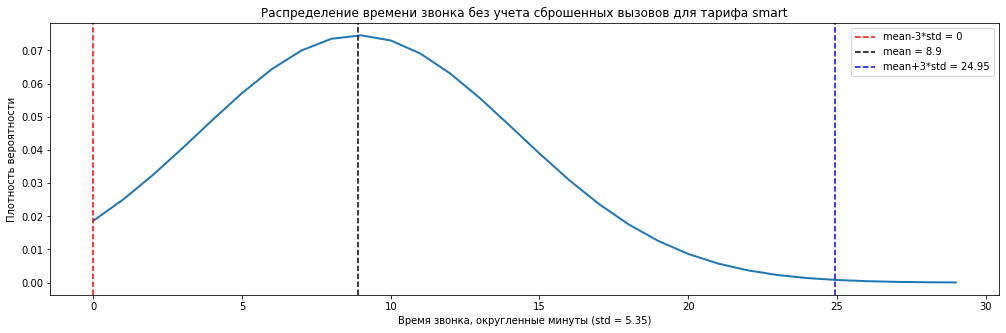

In [34]:
show_plot(duration2tariff.query('tariff == "smart"')['duration'],\
          xlab='Время звонка, округленные минуты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение времени звонка без учета сброшенных вызовов для тарифа smart'], figsize=(17,5))

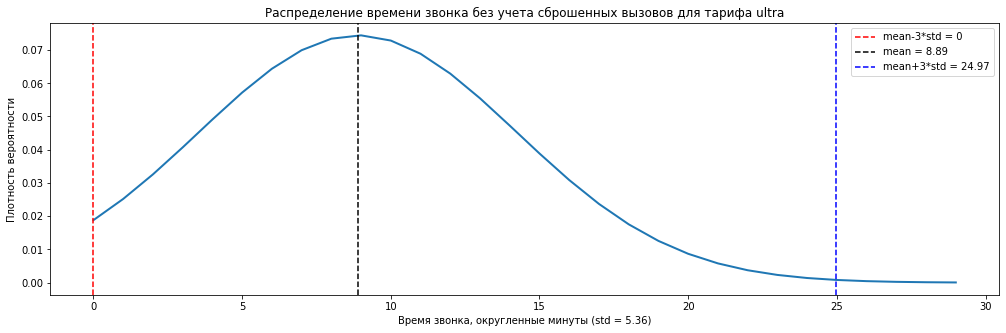

In [35]:
show_plot(duration2tariff.query('tariff == "ultra"')['duration'],\
          xlab='Время звонка, округленные минуты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение времени звонка без учета сброшенных вызовов для тарифа ultra'], figsize=(17,5))

Без более детальных срезов, т.е. "в среднем по больнице" оба тарифа кажутся очень близкими как по среднему, так и максимальному времени звонка (не будем проверять "больничные" гипотезы)

Что из себя представляет трафик? 

In [36]:
df['internet'].sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
15201,15201,1054_181,0.00,2018-08-26,1054
92391,92391,1312_246,221.10,2018-09-27,1312
60625,60625,1204_710,724.35,2018-07-08,1204
64548,64548,1219_455,708.32,2018-07-31,1219
145197,145197,1484_78,648.10,2018-12-30,1484


In [37]:
nullstat(df['internet'])

,Nans,Nans_share
Unnamed: 0,0,0
id,0,0
mb_used,0,0
session_date,0,0
user_id,0,0


In [38]:
df['internet'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [39]:
df['internet'][['mb_used']]\
    .query('mb_used == 0')\
    .count()\
    .to_frame(name='zeros')\
    .assign(zeros_share = lambda row: row['zeros'] / df['internet'][['mb_used']].shape[0]) 

,zeros,zeros_share
mb_used,19598,0.131182


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что переносишь каждый метод на новую строку, так действительно быстрее изучать код 😊👍
    
</div>

Также как и для звонков имеем нулевые значения. И по той же логике, что и для звонков, просто отбросим их:

In [40]:
df['internet'] = df['internet'].query('mb_used > 0')
df['internet'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null object
user_id         129798 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.9+ MB


Осталось преобразовать тип для даты и округлить мегабайты в соответствие с политикой:

In [41]:
df['internet']['session_date'] = df['internet']['session_date'].astype('datetime64')
df['internet'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


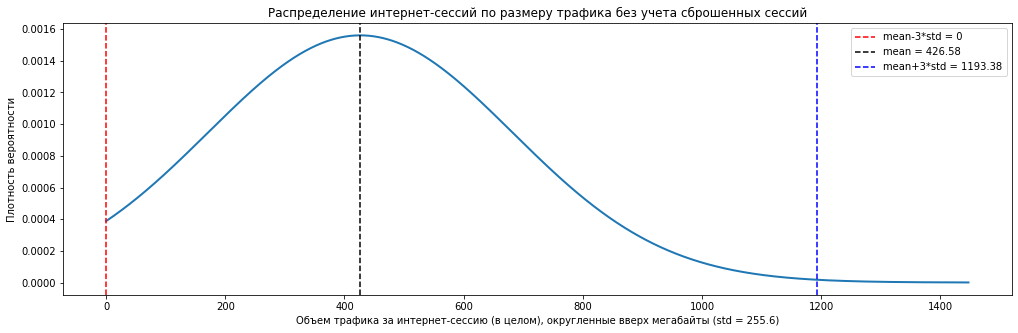

In [42]:
df['internet']['mb_used'] = df['internet']['mb_used'].transform(lambda x: int(np.ceil(x)))
df['internet']['mb_used'] = df['internet']['mb_used'].astype({'mb_used': 'int32'})
show_plot(df['internet'][['mb_used']],\
          xlab='Объем трафика за интернет-сессию (в целом), округленные вверх мегабайты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение интернет-сессий по размеру трафика без учета сброшенных сессий'], figsize=(17,5))

Для интереса, посмотрим в разрезе тарифов:

In [43]:
internet2tariff = df['internet'][['user_id','mb_used']].merge(df['users'][['user_id','tariff']], on='user_id', how='left')
internet2tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 129797
Data columns (total 3 columns):
user_id    129798 non-null int64
mb_used    129798 non-null int32
tariff     129798 non-null object
dtypes: int32(1), int64(1), object(1)
memory usage: 3.5+ MB


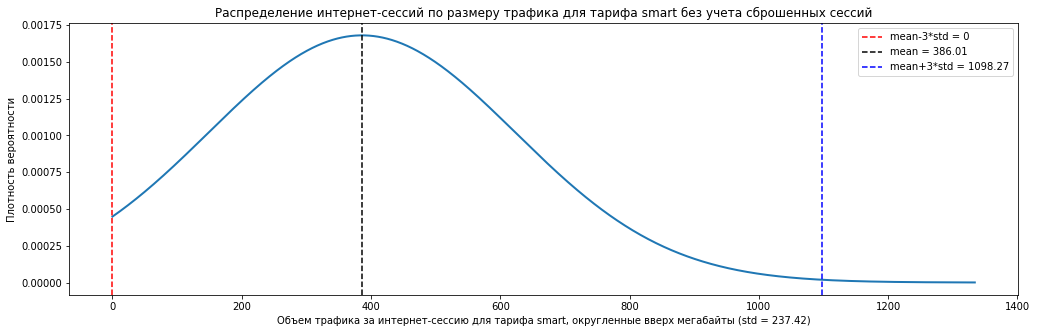

In [44]:
show_plot(internet2tariff.query('tariff == "smart"')['mb_used'],\
          xlab='Объем трафика за интернет-сессию для тарифа smart, округленные вверх мегабайты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение интернет-сессий по размеру трафика для тарифа smart без учета сброшенных сессий'], figsize=(17,5))

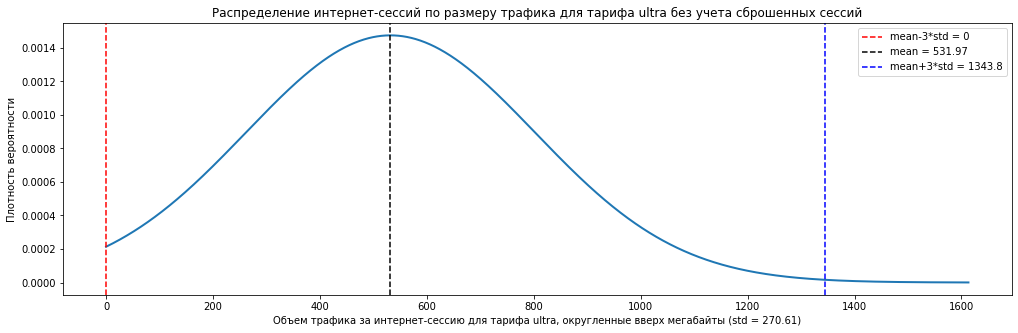

In [45]:
show_plot(internet2tariff.query('tariff == "ultra"')['mb_used'],\
          xlab='Объем трафика за интернет-сессию для тарифа ultra, округленные вверх мегабайты',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение интернет-сессий по размеру трафика для тарифа ultra без учета сброшенных сессий'], figsize=(17,5))

Вполне ожидаемо: гигабайт интернет трафика на ultra дешевле, бесплатного трафика включено больше, и среднее потребление больше. При этом, с технической точкой зрения, люди явно не новости читают или смотрят почту, а потребляют "тяжелый" контент

Посмотрим на сообщения:

In [46]:
df['messages'].sample(5)

,id,message_date,user_id
43488,1187_241,2018-10-27,1187
25643,1105_32,2018-11-28,1105
59659,1262_150,2018-12-16,1262
10043,1039_699,2018-07-03,1039
116650,1474_36,2018-12-15,1474


In [47]:
nullstat(df['messages'])

,Nans,Nans_share
id,0,0
message_date,0,0
user_id,0,0


In [48]:
df['messages'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Преобразуем даты:

In [49]:
df['messages']['message_date'] = df['messages']['message_date'].astype('datetime64')
df['messages'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Просто для интересна, все ли в порядке с таблицей тарифов?

In [50]:
df['tariffs']

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Да, можно работать

Проверим базовую логическую корректность; не должно быть звонков, трафика и смс в периоды, когда человек не пользовался тарифом:

In [51]:
df['calls'][['user_id','call_date']]\
    .merge(df['users'][['user_id', 'reg_date', 'usage_end_date']], on='user_id', how='left')\
    .query('reg_date > call_date < usage_end_date').count()

user_id           0
call_date         0
reg_date          0
usage_end_date    0
dtype: int64

In [52]:
df['internet'][['user_id','session_date']]\
    .merge(df['users'][['user_id', 'reg_date', 'usage_end_date']], on='user_id', how='left')\
    .query('reg_date > session_date < usage_end_date').count()

user_id           0
session_date      0
reg_date          0
usage_end_date    0
dtype: int64

In [53]:
df['messages'][['user_id','message_date']]\
    .merge(df['users'][['user_id', 'reg_date', 'usage_end_date']], on='user_id', how='left')\
    .query('reg_date > message_date < usage_end_date').count()

user_id           0
message_date      0
reg_date          0
usage_end_date    0
dtype: int64

Ok, теперь обогатим фреймы полем "месяц использования":


In [54]:
df['calls']['calls_month'] = df['calls']['call_date'].dt.month
df['internet']['internet_month'] = df['internet']['session_date'].dt.month
df['messages']['messages_month'] = df['messages']['message_date'].dt.month

Отдельно сформируем статистику по каждому виду коммуникаций в разбивке по (пользователь, месяц, тариф):

In [55]:
df['calls_per_month'] = df['calls'][['user_id','calls_month','duration']]\
    .merge(df['users'][['user_id','tariff']], on='user_id', how='left')\
    .groupby(by=['user_id', 'calls_month','tariff'])\
    .agg({'duration': ['count', 'sum']})\
    .reset_index()
df['calls_per_month'].columns = ['user_id','calls_month','tariff','calls_count','duration']
df['calls_per_month'].sample(5)

,user_id,calls_month,tariff,calls_count,duration
1900,1303,9,ultra,68,610
1816,1291,8,smart,56,487
2345,1376,6,smart,45,396
1569,1251,5,smart,49,433
2074,1331,11,ultra,50,497


In [56]:
df['internet_per_month'] = df['internet'][['user_id','internet_month','mb_used']]\
    .merge(df['users'][['user_id','tariff']], on='user_id', how='left')\
    .groupby(by=['user_id', 'internet_month','tariff'])\
    .agg({'mb_used': ['count', 'sum']})\
    .reset_index()
df['internet_per_month'].columns = ['user_id','internet_month','tariff','sessions_count','mb_used']
df['internet_per_month']['gb_used'] = df['internet_per_month']['mb_used'].apply( lambda x: int(np.ceil(x / 1024)))
df['internet_per_month'].sample(5)

,user_id,internet_month,tariff,sessions_count,mb_used,gb_used
2415,1381,4,ultra,57,28383,28
1016,1159,12,smart,85,35178,35
2396,1378,10,smart,32,13848,14
1347,1210,11,smart,42,17127,17
1413,1221,12,smart,23,7897,8


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что учитываем условия работы оператора связи и применяем метод `np.ceil`. 
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего применять метод `np.ceil` ко всему столбцу целиком, потому что на больших объемах данных, метод `apply` может работать очень долго, т.к. применяет свои методы к каждой строке. 
    
    
</div>

In [57]:
df['messages_per_month'] = df['messages'][['user_id','messages_month']]\
    .merge(df['users'][['user_id','tariff']], on='user_id', how='left')\
    .groupby(by=['user_id', 'messages_month','tariff'])\
    .agg({'messages_month': ['count']})\
    .reset_index()
df['messages_per_month'].columns = ['user_id','messages_month','tariff','messages_count']
df['messages_per_month'].sample(5)

,user_id,messages_month,tariff,messages_count
1459,1282,4,smart,79
266,1051,6,smart,3
581,1105,11,smart,79
612,1112,10,smart,98
1122,1215,10,smart,16


Обогатим фремы данными о числе включенных в тарифы объемах (минут, трафика, сообщений):

In [58]:
df['calls_per_month_enriched'] = df['calls_per_month']\
    .merge(df['tariffs'][['tariff_name','minutes_included','rub_per_minute']],\
        left_on='tariff',\
        right_on='tariff_name',\
        how='inner') 
df['calls_per_month_enriched'].sample(5)

,user_id,calls_month,tariff,calls_count,duration,tariff_name,minutes_included,rub_per_minute
2502,1340,11,smart,55,539,smart,500,3
1920,1210,9,smart,72,680,smart,500,3
1915,1209,10,smart,32,322,smart,500,3
322,1200,4,ultra,5,50,ultra,3000,1
1368,1092,8,smart,47,411,smart,500,3


In [59]:
df['internet_per_month_enriched'] = df['internet_per_month']\
    .merge(df['tariffs'][['tariff_name','mb_per_month_included','rub_per_gb']],\
        left_on='tariff',\
        right_on='tariff_name',\
        how='inner') 
df['internet_per_month_enriched']['gb_per_month_included'] \
    = df['internet_per_month_enriched']['mb_per_month_included']\
        .apply(lambda x: int(np.ceil(x / 1024)))
df['internet_per_month_enriched'].sample(5)

,user_id,internet_month,tariff,sessions_count,mb_used,gb_used,tariff_name,mb_per_month_included,rub_per_gb,gb_per_month_included
377,1225,4,ultra,8,4550,5,ultra,30720,150,30
1375,1086,5,smart,43,17336,17,smart,15360,200,15
2064,1235,10,smart,35,13443,14,smart,15360,200,15
1940,1209,8,smart,59,22313,22,smart,15360,200,15
2963,1448,11,smart,60,21260,21,smart,15360,200,15


In [60]:
df['messages_per_month_enriched'] = df['messages_per_month']\
    .merge(df['tariffs'][['tariff_name','messages_included','rub_per_message']],\
        left_on='tariff',\
        right_on='tariff_name',\
        how='inner') 
df['messages_per_month_enriched'].sample(5)

,user_id,messages_month,tariff,messages_count,tariff_name,messages_included,rub_per_message
332,1270,12,ultra,48,ultra,1000,1
1209,1102,12,smart,30,smart,50,3
2276,1394,8,smart,1,smart,50,3
1386,1147,11,smart,36,smart,50,3
878,1025,3,smart,14,smart,50,3


Сформируем чуть более полезные в дальнейшем фреймы с детализацией по переплате (звонкам, трафику, сообщениям)

In [61]:
def enrich_with_overpaid_calls(row):
    row['overpaid_calls_rub'] = \
        0 if row['duration'] <= row['minutes_included']\
        else (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    return row
df['calls_per_month_overpaid'] = df['calls_per_month_enriched']\
    .apply(enrich_with_overpaid_calls, axis=1)\
        [['user_id','calls_month','tariff','calls_count','duration','overpaid_calls_rub']]
df['calls_per_month_overpaid'].sample(5)

,user_id,calls_month,tariff,calls_count,duration,overpaid_calls_rub
541,1325,8,ultra,63,575,0
1719,1171,7,smart,73,679,537
0,1000,5,ultra,17,159,0
1350,1086,7,smart,58,529,87
503,1300,8,ultra,81,701,0


In [62]:
def enrich_with_overpaid_internet(row):
    row['overpaid_internet_rub'] = \
        0 if row['mb_used'] <= row['mb_per_month_included']\
        else (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb'] # Мегалайн беспощаден!
    return row
df['internet_per_month_overpaid'] = df['internet_per_month_enriched']\
    .apply(enrich_with_overpaid_internet, axis=1)\
        [['user_id','internet_month','tariff','sessions_count','mb_used','gb_used','overpaid_internet_rub']]
df['internet_per_month_overpaid'].sample(5)

,user_id,internet_month,tariff,sessions_count,mb_used,gb_used,overpaid_internet_rub
2300,1290,9,smart,50,19843,20,1000
2585,1362,11,smart,19,8908,9,0
2026,1227,1,smart,41,16648,17,400
2515,1339,9,smart,49,20170,20,1000
2289,1287,10,smart,80,31744,31,3200


In [63]:
def enrich_with_overpaid_messages(row):
    row['overpaid_messages_rub'] = \
        0 if row['messages_count'] <= row['messages_included']\
        else (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    return row
df['messages_per_month_overpaid'] = df['messages_per_month_enriched']\
    .apply(enrich_with_overpaid_messages, axis=1)\
        [['user_id','messages_month','tariff','messages_count','overpaid_messages_rub']]
df['messages_per_month_overpaid'].sample(5)

,user_id,messages_month,tariff,messages_count,overpaid_messages_rub
1489,1174,9,smart,57,21
1365,1145,4,smart,60,30
2199,1373,2,smart,38,0
278,1222,10,ultra,133,0
506,1352,8,ultra,14,0


Теперь соберем фиксированную плату по тарифам; для этого соберем все возможные сочетания (user_id, month, tariff) и обогатим их из таблицы тарифов:

In [64]:
_cols = ['user_id','month','tariff']
df['users_stats'] = pd.concat([\
        df['calls_per_month_overpaid'].rename(columns={'calls_month':'month'})[_cols],\
        df['internet_per_month_overpaid'].rename(columns={'internet_month':'month'})[_cols],\
        df['messages_per_month_overpaid'].rename(columns={'messages_month':'month'})[_cols]\
]).drop_duplicates()\
    .merge(df['tariffs'][['tariff_name','rub_monthly_fee']],left_on='tariff',right_on='tariff_name')\
    [['user_id','month','tariff','rub_monthly_fee']]
df['users_stats'].sample(5)

,user_id,month,tariff,rub_monthly_fee
831,1436,8,ultra,1950
1447,1103,12,smart,550
270,1166,9,ultra,1950
260,1152,9,ultra,1950
936,1491,9,ultra,1950


Последовательно обогатим user_stats из overpaid-фреймов,заменяя NaN на 0 (для случаев, если у клиента не было какого-то вида коммуникаций) + добавим поле "всего оплачено за месяц", как сумму всех услуг + стоимость тарифа

In [65]:
df['users_final'] = df['users_stats']\
    .merge(\
        df['calls_per_month_overpaid'],\
        left_on=['user_id','month','tariff'],\
        right_on=['user_id','calls_month','tariff'],\
        how='left').fillna(0)\
    .merge(\
        df['internet_per_month_overpaid'],\
        left_on=['user_id','month','tariff'],\
        right_on=['user_id','internet_month','tariff'],\
        how='left').fillna(0)\
    .merge(\
        df['messages_per_month_overpaid'],\
        left_on=['user_id','month','tariff'],\
        right_on=['user_id','messages_month','tariff'],\
        how='left').fillna(0)\
    [[\
      'user_id', 'month', 'tariff','rub_monthly_fee',\
      'calls_count', 'duration','overpaid_calls_rub',\
      'sessions_count','mb_used','gb_used','overpaid_internet_rub',\
      'messages_count', 'overpaid_messages_rub'
    ]].rename(\
        columns={
            'rub_monthly_fee': 'fixed_rub',\
            'calls_count': 'calls',\
            'overpaid_calls_rub': 'calls_rub',\
            'sessions_count': 'sessions',\
            'overpaid_internet_rub': 'internet_rub',\
            'messages_count': 'msg',\
            'overpaid_messages_rub': 'msg_rub'\
        }).astype({\
            'calls': 'int32',\
            'duration': 'int32',\
            'sessions': 'int32',\
            'mb_used': 'int32',\
            'gb_used': 'int32',\
            'msg': 'int32',\
            }).assign(total_rub = lambda row: \
                      row['fixed_rub'] + \
                      row['calls_rub'] + \
                      row['internet_rub'] + \
                      row['msg_rub'])
df['users_final'].sample(5)

,user_id,month,tariff,fixed_rub,calls,duration,calls_rub,sessions,mb_used,gb_used,internet_rub,msg,msg_rub,total_rub
1672,1149,11,smart,550,30,281,0.0,62,25119,25,2000.0,74,72.0,2622.0
2940,1437,10,smart,550,38,297,0.0,50,18498,19,800.0,14,0.0,1350.0
2360,1301,10,smart,550,70,595,285.0,45,19661,20,1000.0,0,0.0,1835.0
1703,1157,9,smart,550,55,540,120.0,45,20227,20,1000.0,0,0.0,1670.0
1317,1068,9,smart,550,60,564,192.0,52,21090,21,1200.0,21,0.0,1942.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом таблицы мы соединили верно.
    
Однако при их соединении мы всё таки потеряли 2–х клиентов. В данный момент для нас это не критично, но в боевой задаче мы не захотим тепять эти данные.
    
Поэтому важно понимать, как так произошло.
    
В целом наша задача решается когда мы присоединяем данные к той таблице, в которой есть все пользователи.

</div>

In [103]:
print(f'Количество клиентов: {df["users_final"].user_id.nunique()}')

Количество клиентов: 498


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выручка посчитана верно.
</div>

In [104]:
df['users_final']['total_rub'].describe()

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: total_rub, dtype: float64

In [66]:
df['users_final'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id         3214 non-null int64
month           3214 non-null int64
tariff          3214 non-null object
fixed_rub       3214 non-null int64
calls           3214 non-null int32
duration        3214 non-null int32
calls_rub       3214 non-null float64
sessions        3214 non-null int32
mb_used         3214 non-null int32
gb_used         3214 non-null int32
internet_rub    3214 non-null float64
msg             3214 non-null int32
msg_rub         3214 non-null float64
total_rub       3214 non-null float64
dtypes: float64(4), int32(6), int64(3), object(1)
memory usage: 301.3+ KB


Хорошо, данные приведены в готовый для анализа вид.

### Анализ данных

Когда пользователи любят поговорить больше всего? 

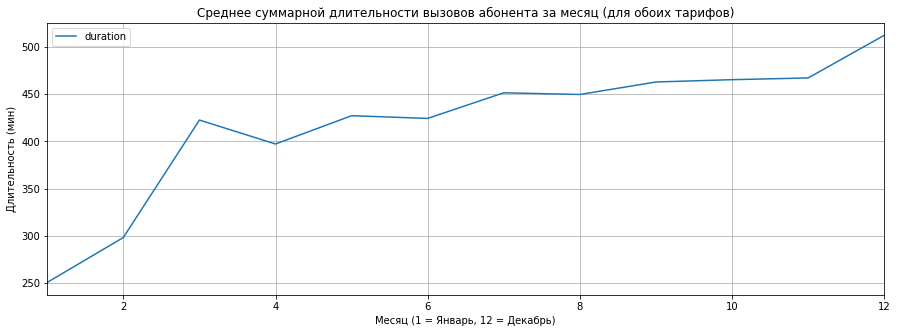

In [67]:
show_plot(
    df['users_final'][['month','duration']].pivot_table(index='month', aggfunc={'duration':'mean'}),\
    xlab='Месяц (1 = Январь, 12 = Декабрь)',\
    ylab='Длительность (мин)', \
    name='Среднее суммарной длительности вызовов абонента за месяц (для обоих тарифов)',\
    ptype=['line'], figsize=(15,5))



In [68]:
df['users_final'][['month','duration']].pivot_table(index='month', aggfunc=['mean','std'])

,mean,std
,duration,duration
month,,
1,250.790698,202.662464
2,298.231707,224.919591
3,422.377193,249.890539
4,397.065868,219.999566
5,426.971154,231.535536
6,424.112903,229.425518
7,451.184932,235.378514
8,449.409357,236.739204


А в разрезе тарифов?

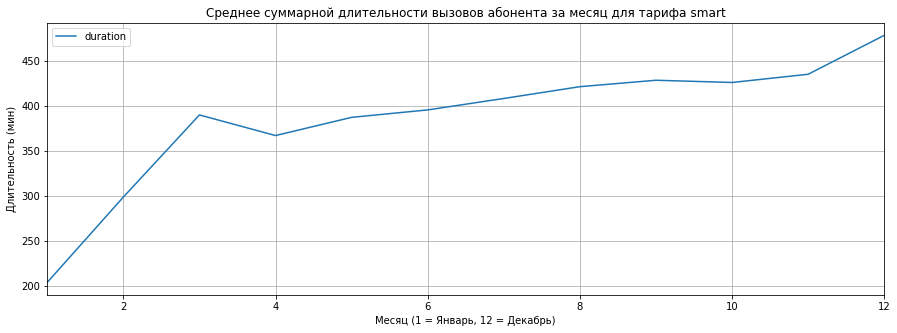

In [69]:
show_plot(
    df['users_final'][['month','duration','tariff']]\
        .query('tariff == "smart"')[['month','duration']]\
        .pivot_table(index='month', aggfunc={'duration':'mean'}),\
    xlab='Месяц (1 = Январь, 12 = Декабрь)',\
    ylab='Длительность (мин)', \
    name='Среднее суммарной длительности вызовов абонента за месяц для тарифа smart',\
    ptype=['line'], figsize=(15,5))

In [70]:
df['users_final'][['month','duration','tariff']]\
        .query('tariff == "smart"')[['month','duration']]\
        .pivot_table(index='month', aggfunc=['mean','std'])

,mean,std
,duration,duration
month,,
1,203.852941,154.231454
2,298.689655,190.820041
3,390.051948,191.893604
4,367.133929,186.489161
5,387.361702,186.601343
6,395.640244,175.336587
7,408.353234,179.583601
8,421.468085,186.530382


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются, это говорит о том, что мы можем создать функцию для расчетов сводной таблицей. Тем самым оптимизировав свой код.
    
</div>

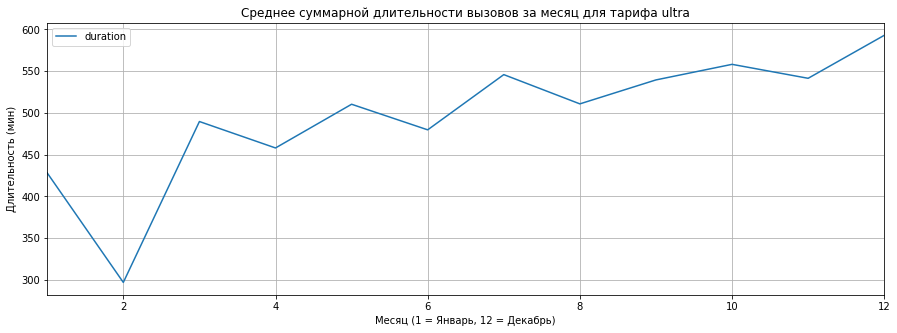

In [71]:
show_plot(
    df['users_final'][['month','duration','tariff']]\
        .query('tariff == "ultra"')[['month','duration']]\
        .pivot_table(index='month', aggfunc={'duration':'mean'}),\
    xlab='Месяц (1 = Январь, 12 = Декабрь)',\
    ylab='Длительность (мин)', \
    name='Среднее суммарной длительности вызовов за месяц для тарифа ultra',\
    ptype=['line'], figsize=(15,5))

In [72]:
df['users_final'][['month','duration','tariff']]\
        .query('tariff == "ultra"')[['month','duration']]\
        .pivot_table(index='month', aggfunc=['mean','std'])

,mean,std
,duration,duration
month,,
1,428.111111,269.757968
2,297.125000,296.512528
3,489.648649,333.743765
4,458.018182,267.682405
5,510.328358,289.603511
6,479.702381,302.549081
7,545.791209,307.119322
8,510.775701,312.980026


В сочетании с наличием некоторого количество "отказников" аккурат с августа, прямо таки тянет ряд дополнительных вопросов (но не будем). Или проанализировать рекомендацию "в целях увеленичения выручки реализовывать маркетинговые мероприятия с расчетом максимальный роста клиентской базы к сентябрю" (но тут столько надо всего проверить, аж страшно, поэтому, опять же, не будем) 

А что в среднем по тарифам?

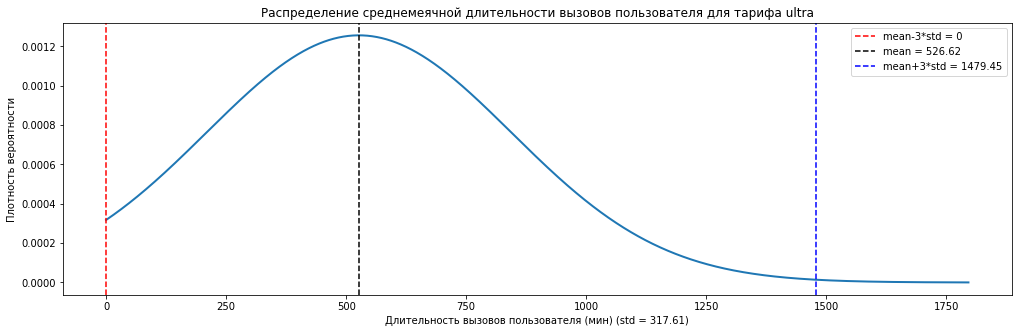

In [73]:
show_plot(df['users_final'][['duration','tariff']]\
            .query('tariff == "ultra"')[['duration']],\
          xlab='Длительность вызовов пользователя (мин)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение среднемеячной длительности вызовов пользователя для тарифа ultra'], figsize=(17,5))

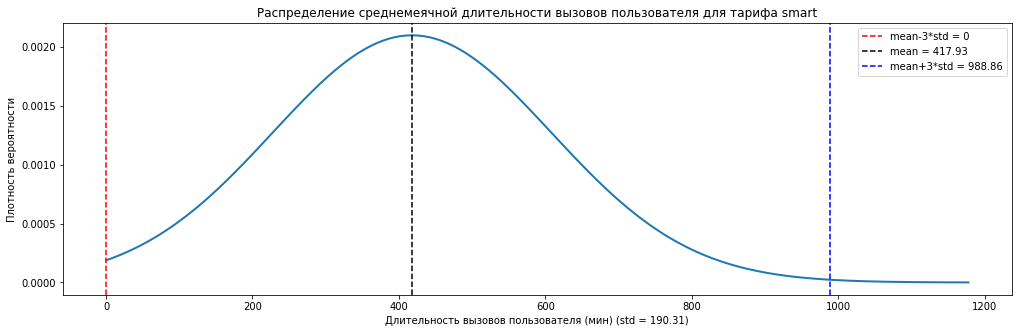

In [74]:
show_plot(df['users_final'][['duration','tariff']]\
            .query('tariff == "smart"')[['duration']],\
          xlab='Длительность вызовов пользователя (мин)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение среднемеячной длительности вызовов пользователя для тарифа smart'], figsize=(17,5))

Выводы по минутам: 

- В среднем на тарифе ultra говорят 526 минут в месяц (при этом более 1479 минут не наговаривает практически никто)
- На тарифе smart в среднем говоря 417 минут (при этом более 988 минут не наговаривает практически никто)

Что это означает для Мегалайна? Прежде всего, что **"минуты" в тарифе ultra - "гарантированно нерабочие"**, т.е. заработать на них не получится (1479 < 3000). А вот 417 минут среднего для smart при включенном пакете в 500 минут вполне дают возможность заработать. С какой вероятностью Мегалайн будет зарабатывать дополнительные деньги на звонках тарифа smart? ~33%:

In [75]:
smart_calls = df['users_final'][['duration','tariff']].query('tariff == "smart"')[['duration']]
p500 = 1 - norm(smart_calls['duration'].mean(), smart_calls['duration'].std()).cdf(500)
print(p500)


0.33315809361132775


Или можно чуть иначе подойти к расчетам, но получить те же 33%:

In [76]:
df['users_final'][['duration','tariff','calls_rub']]\
    .query('calls_rub > 0')[['tariff']]\
    .count()\
    .to_frame(name='working_minutes_smart')\
    .assign(share_of_working_minutes_smart = lambda x: \
        x['working_minutes_smart'] /  df['users_final'][['tariff']].query('tariff == "smart"').count())


,working_minutes_smart,share_of_working_minutes_smart
tariff,754,0.338268


Чуть попроще (только в контексте распределений), взглянем на трафик. Для тарифа "ultra":

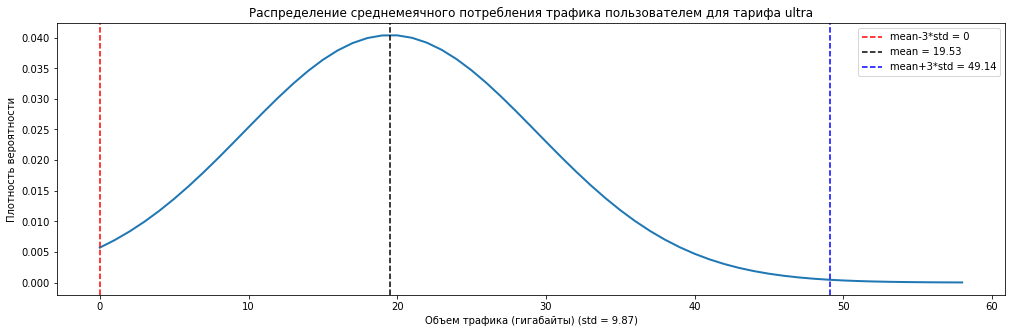

In [77]:
show_plot(df['users_final'][['gb_used','tariff']]\
            .query('tariff == "ultra"')[['gb_used']],\
          xlab='Объем трафика (гигабайты)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение среднемеячного потребления трафика пользователем для тарифа ultra'], figsize=(17,5))

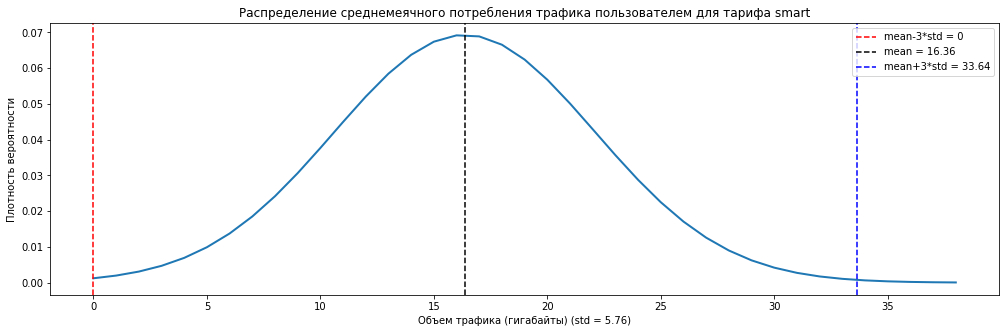

In [78]:
show_plot(df['users_final'][['gb_used','tariff']]\
            .query('tariff == "smart"')[['gb_used']],\
          xlab='Объем трафика (гигабайты)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение среднемеячного потребления трафика пользователем для тарифа smart'], figsize=(17,5))

Опять интересно, вероятность дополнительного заработка на трафике в тарифе ultra ниже чем на smart:

In [79]:
smart_internet = df['users_final'][['gb_used','tariff']].query('tariff == "smart"')[['gb_used']]
p15 = 1 - norm(smart_internet['gb_used'].mean(), smart_internet['gb_used'].std()).cdf(15)
print(p15)

0.5933071347703331


In [80]:
ultra_internet = df['users_final'][['gb_used','tariff']].query('tariff == "ultra"')[['gb_used']]
p30= 1 - norm(ultra_internet['gb_used'].mean(), ultra_internet['gb_used'].std()).cdf(30)
print(p30)

0.14419650750279145


Выводы по трафику: 

- В среднем на тарифе ultra потребляют 19.5 гигабайт трафика в месяц (при этом более 49 гигабайт не использует практически никто)
- В среднем на тарифе smart потребляют 16.3 гигабайт трафика в месяц (при этом более 33 гигабайт не использует практически никто)
- Вероятность заработать дополнительный доход на трафике выше у smart (59% против 14%); фактически, можно заключить, что большая часть трафика ultra "нерабочая"



Что с сообщениями? Для ultra: 

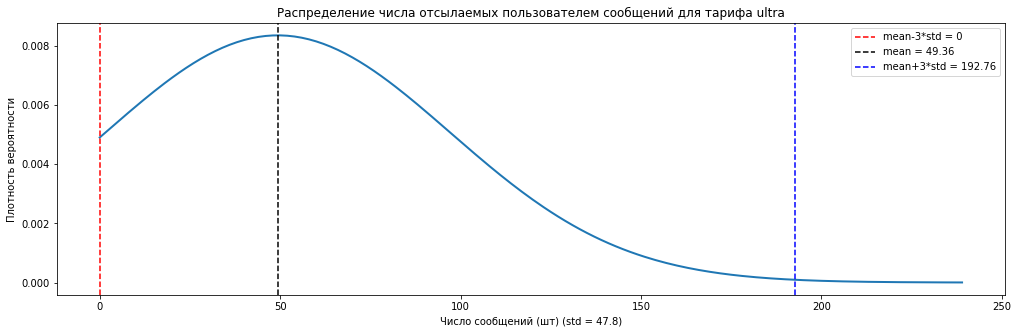

In [81]:
show_plot(df['users_final'][['msg','tariff']]\
            .query('tariff == "ultra"')[['msg']],\
          xlab='Число сообщений (шт)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение числа отсылаемых пользователем сообщений для тарифа ultra'], figsize=(17,5))

Не получится у Мегалайна заработать на сообщениях в ultra дополнительные средства. А для smart? 

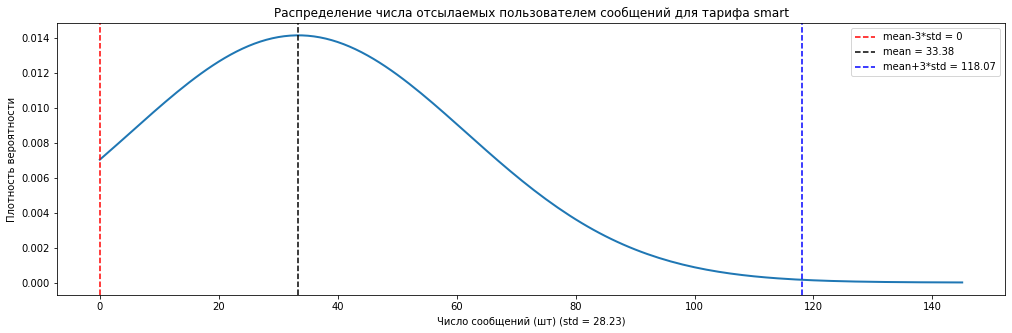

In [82]:
show_plot(df['users_final'][['msg','tariff']]\
            .query('tariff == "smart"')[['msg']],\
          xlab='Число сообщений (шт)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение числа отсылаемых пользователем сообщений для тарифа smart'], figsize=(17,5))

А для smart сообщения "рабочие" с вероятностью равной:

In [83]:
smart_messages = df['users_final'][['msg','tariff']].query('tariff == "smart"')[['msg']]
p50= 1 - norm(smart_messages['msg'].mean(), smart_messages['msg'].std()).cdf(50)
print(p50)

0.27805241224107813


Выводы по сообщениями: 

- В среднем на тарифе ultra отправляют 50 сообщений в месяц (при этом более 192 не отправляет практически никто)
- В среднем на тарифе smart отправляют 33 сообщения в месяц (при этом более 118 не отправляет практически никто)
- Вероятность заработать дополнительный доход на сообщениях есть только у smart (27%); а сообщения в ultra - "нерабочие"

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Очень детально проверили наш анализ пользователей, выводы абсолютно логичны и даже придраться не к чему 😊👍
    
Предлагаю приступить к проверке наших гипотез.
    
</div>

### Провека гипотез (и немного еще)


Посмотрим на самое интересное - распределение выручки по тарифам:

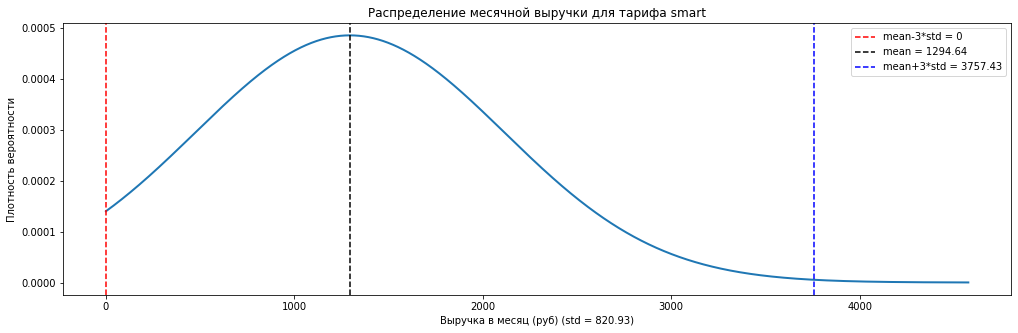

In [84]:
show_plot(df['users_final'][['total_rub','tariff']]\
            .query('tariff == "smart"')[['total_rub']],\
          xlab='Выручка в месяц (руб)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение месячной выручки для тарифа smart'], figsize=(17,5))

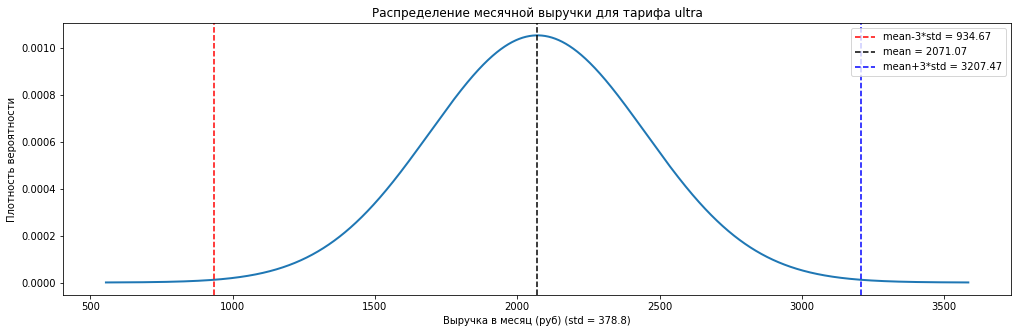

In [85]:
show_plot(df['users_final'][['total_rub','tariff']]\
            .query('tariff == "ultra"')[['total_rub']],\
          xlab='Выручка в месяц (руб)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение месячной выручки для тарифа ultra'], figsize=(17,5))

Очевидно, ultra в абсолютном выражении (среднее = 2071) превосходит smart (среднее = 1294) по месячной выручке. 
Поможет ли это ответить на вопрос в формулировке "коммерческий департамент хочет понять, какой тариф приносит больше денег".
Нет, прежде всего потому что вопрос сформулирован неполно:
- хочет ли коммерческий департамент определеить gross margin (где в таком случае данные о COGS - возможно в ultra используется приоретизация трафика или более дорогие внешние каналы) или там сидят ребята, которые ориентированы просто на выручку - любимое в наших широтах "ни и пусть операционно убыточен, зато какие обороты! (а мы-то ведь и живем на процент от них)"
- интересует ли коммерческий департамент абсолютная величина или взвешенная. Например, попробуем просто нормировать среднее на доли тарифов в выборке, и тут же увидем, что smart дает в общую выручку вклад почти в 1.41 раза больше:

In [86]:
normalized_ultra = 2071 * df['users_final'].query('tariff == "ultra"')['user_id'].count() / df['users_final'].shape[0]
normalized_ultra

634.7028624766646

In [87]:
normalized_smart = 1294 * df['users_final'].query('tariff == "smart"')['user_id'].count() / df['users_final'].shape[0]
normalized_smart

897.4256378344742

In [88]:
normalized_smart / normalized_ultra

1.4139303458198424

Можно и "в лоб" получить те же цифры:

In [89]:
df['users_final'].query('tariff == "smart"')['total_rub'].sum() / df['users_final'].query('tariff == "ultra"')['total_rub'].sum() 

1.4145838235294117

Теперь нам остается только выполнить последний пункт задачи: проверить гипотезы 

**Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

- H<sub>0</sub>: средняя выручка пользователей тарифов ultra и smart одинакова
- H<sub>1</sub>: средняя выручка пользователей тарифов ultra и smart различается

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    
<s>Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте. 
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.</s>
    
</div>

In [90]:
smart_var = df['users_final'].query('tariff == "smart"')['total_rub'].var() 
ultra_var = df['users_final'].query('tariff == "ultra"')['total_rub'].var() 
print('дисперсия выручки smart =',smart_var,'дисперсия выручки ultra =',ultra_var)

дисперсия выручки smart = 673931.3213632443 дисперсия выручки ultra = 143491.24055961377


In [91]:
alpha = 0.05
results = ttest_ind(\
        df['users_final'].query('tariff == "smart"')['total_rub'],\
        df['users_final'].query('tariff == "ultra"')['total_rub'],\
        equal_var=False
) 
if results.pvalue < alpha:
    print('Результат теста: отвергаем нулевую гипотезу, т.к.', results.pvalue, '<',alpha)
else: 
    print('Результат тест: нельзя отвергать нулевую гипотезу, т.к.', results.pvalue, '>',alpha)

Результат теста: отвергаем нулевую гипотезу, т.к. 2.7240946993530846e-246 < 0.05


Прямо так "очень уверенно отвергаем" гипотезу о равенстве выручек, что соответствует "физике данных"

**Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**
- H<sub>0</sub>: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
- H<sub>1</sub>: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
        
</div>

In [92]:
df['users_final_with_cities'] = df['users_final'].merge(df['users'][['user_id','city']], on='user_id', how='inner')
moscow_var = df['users_final_with_cities'].query('city == "Москва"')['total_rub'].var() 
region_var = df['users_final_with_cities'].query('city != "Москва"')['total_rub'].var() 
print('дисперсия выручки в Москва =',moscow_var,'дисперсия выручки не в Москве =',region_var)

дисперсия выручки в Москва = 566183.0292184273 дисперсия выручки не в Москве = 656766.5955122438


In [93]:
alpha = 0.05
results = ttest_ind(\
        df['users_final_with_cities'].query('city == "Москва"')['total_rub'],\
        df['users_final_with_cities'].query('city != "Москва"')['total_rub'],\
        equal_var=True
) 
if results.pvalue < alpha:
    print('Результат теста: отвергаем нулевую гипотезу, т.к.', results.pvalue, '<',alpha)
else: 
    print('Результат тест: нельзя отвергать нулевую гипотезу, т.к.', results.pvalue, '>',alpha)

Результат тест: нельзя отвергать нулевую гипотезу, т.к. 0.531666503831252 > 0.05


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Думаю в том числе мы можем создать функцию для проверки наших стат.тестов, тем самым оптимизировав свой код.    
</div>

Посмотрим на распределения:

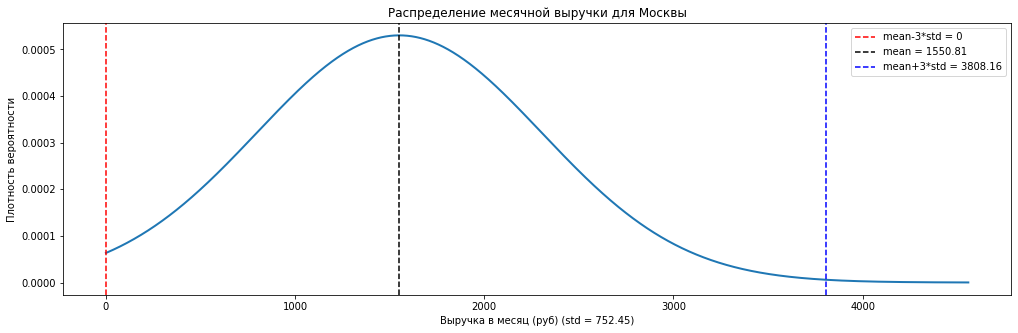

In [94]:
show_plot(df['users_final_with_cities'][['total_rub','city']]\
            .query('city == "Москва"')[['total_rub']],\
          xlab='Выручка в месяц (руб)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение месячной выручки для Москвы'], figsize=(17,5))

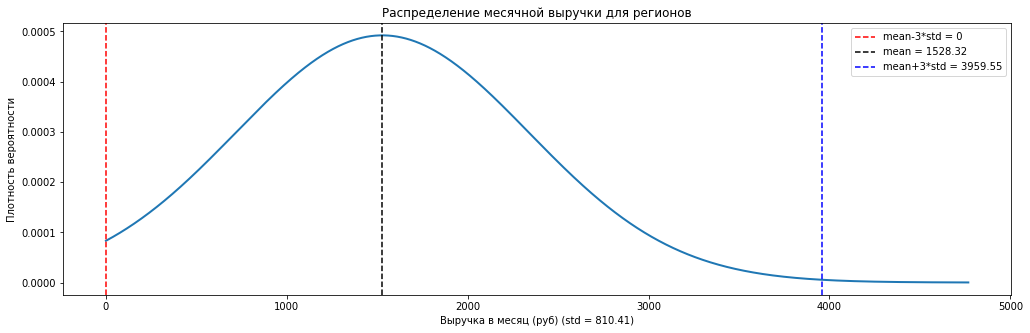

In [95]:
show_plot(df['users_final_with_cities'][['total_rub','city']]\
            .query('city != "Москва"')[['total_rub']],\
          xlab='Выручка в месяц (руб)',
          ylab='Плотность вероятности',
          ptype=['pdf','Распределение месячной выручки для регионов'], figsize=(17,5))

Да, очень близки средние значения выручек в Москве (1550) и регионах (1528)

### Выводы

1. В указанной формирулирвке невозможно точно ответиь на вопрос задача без детализации. 
В абсолютном выражении ultra "приносит больше денег", но при нормировке на долю тарифов, выгоднее уже smart
1. Конфигурация smart позволяет зарабатывать на превышении пользователями пакетных значений минут, трафика и сообщений
1. Средняя выручка пользователей тарифов не равна.
1. Значимой разнице между выручкой в Москве и регионах нет.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (общий):</b>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок второго уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    

</div>